<a href="https://colab.research.google.com/github/amulyaojha11/Temperature-Prediction-of-Indian-Cities/blob/main/Data%20Preprocessing/Chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ARIMA and Seasonal ARIMA**#

###**Autoregressive Integrated Moving**###

#The general process for ARIMA models is the following:
*  *Visualize the Time Series Data*
*   *Make the time series data stationary*
*   *Plot the Correlation and AutoCorrelation Charts*
*   *Construct the ARIMA Model or Seasonal ARIMA based on the data*
*  *Use the model to make predictions*



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Chennai.csv',index_col='Date' )

In [ ]:
df.head()

,Temperature
Date,
2009-01-01,25.1
2009-02-01,26.6
2009-03-01,28.5
2009-04-01,30.8
2009-05-01,32.1


In [ ]:
df.tail()

,Temperature
Date,
2019-03-01,29.9
2019-04-01,31.8
2019-05-01,33.2
2019-06-01,33.6
2019-07-01,31.6


In [ ]:
df.dropna(inplace=True)

#**Visualize the Data**#

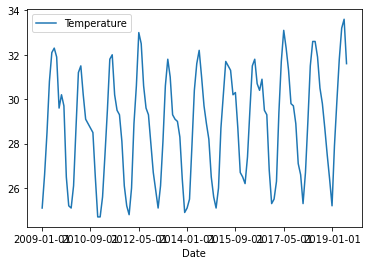

In [ ]:
df.plot()

##**Testing for Stationarity**##

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
     dftest = adfuller(dataset)
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
     if dftest[1] <= 0.05:
        print("Data is stationary")
     else:
        print("Data is non-stationary ")
    
ad_test(df['Temperature'])

1. ADF :  -0.7286056206046474
2. P-Value :  0.8392002637998224
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947
Data is non-stationary 


##**Differencing**##

In [ ]:
df['Seasonal First Difference']=df['Temperature']-df['Temperature'].shift(12)

In [ ]:
df.head()

,Temperature,Seasonal First Difference
Date,,
2009-01-01,25.1,NaN
2009-02-01,26.6,NaN
2009-03-01,28.5,NaN
2009-04-01,30.8,NaN
2009-05-01,32.1,NaN


In [ ]:
ad_test(df['Seasonal First Difference'].dropna())

1. ADF :  -3.2684872693439093
2. P-Value :  0.016347216198818817
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 102
5. Critical Values :
	 1% :  -3.4961490537199116
	 5% :  -2.8903209639580556
	 10% :  -2.5821223452518263
Data is stationary


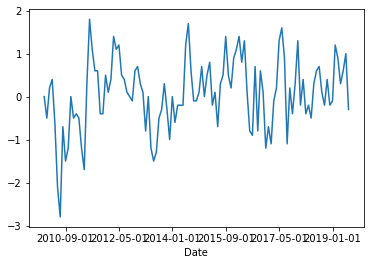

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(12)

In [ ]:
df.head()

,Temperature,Seasonal First Difference,Seasonal Second Difference
Date,,,
2009-01-01,25.1,NaN,NaN
2009-02-01,26.6,NaN,NaN
2009-03-01,28.5,NaN,NaN
2009-04-01,30.8,NaN,NaN
2009-05-01,32.1,NaN,NaN


In [ ]:
ad_test(df['Seasonal Second Difference'].dropna())

1. ADF :  -2.896168009348592
2. P-Value :  0.045795423926290144
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 90
5. Critical Values :
	 1% :  -3.505190196159122
	 5% :  -2.894232085048011
	 10% :  -2.5842101234567902
Data is stationary


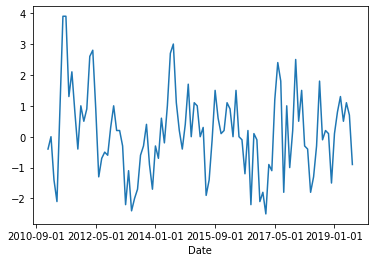

In [ ]:
df['Seasonal Second Difference'].plot()